In [20]:
import tensorflow as tf
from tensorflow.python.framework import ops

from test.imgload.imgload import loaddta

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from test.convolutional.convlayers import bias_variable
from test.convolutional.convlayers import conv2d
from test.convolutional.convlayers import conv_layer
from test.convolutional.convlayers import full_layer
from test.convolutional.convlayers import max_pool_2x2

def display(img):
    # (784) => (28,28)
    one_image = img.reshape(28, 28)
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)
    plt.show()


load img

In [50]:
X_loaded, Y_loaded = loaddta('../input/train.csv')

X_train = X_loaded[:, 0:39000]
Y_train = Y_loaded[:, 0:39000].T
X_test = X_loaded[:, 39001:41999]
Y_test = Y_loaded[:, 39001:41999].T


print('X_train shape:' + str(X_train.shape))
print('Y_train shape:' + str(Y_train.shape))
print('X_test shape:' + str(X_test.shape))
print('Y_test shape:' + str(Y_test.shape))

image_size => 784
image_width => 28
image_height => 28
X_train shape:(784, 39000)
Y_train shape:(39000, 10)
X_test shape:(784, 2998)
Y_test shape:(2998, 10)


###### reshape:

In [51]:
x_images_train = tf.reshape(X_train, [-1, 28, 28, 1])
x_images_test = tf.reshape(X_test, [-1, 28, 28, 1])

print('x_images_train shape:' + str(x_images_train.shape))
print('x_images_test shape:' + str(x_images_test.shape))

x_images_train shape:(39000, 28, 28, 1)
x_images_test shape:(2998, 28, 28, 1)


###### display img:

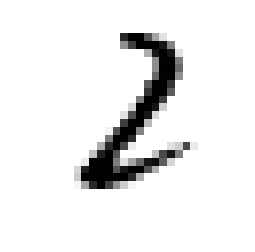

In [24]:
display(X_train[:, 1701])

###### Placeholders:

In [26]:
#TODO: use later for minibatch

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [54]:
x_images_train = tf.cast(x_images_train, tf.float32)

conv1 = conv_layer(x_images_train, shape=[5, 5, 1, 32])
conv1_pool = max_pool_2x2(conv1)

conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)

conv2_flat = tf.reshape(conv2_pool, [-1, 7*7*64])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))

keep_prob = tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_conv = full_layer(full1_drop, 10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=Y_train))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(Y_train, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [55]:
print("conv1: " + str(conv1))
print("conv1_pool: " + str(conv1_pool))
print("conv2: " + str(conv2))
print("conv2_pool: " + str(conv2_pool))
print("conv2_flat: " + str(conv2_flat))
print("full_1: " + str(full_1))
print("y_conv: " + str(y_conv))

conv1: Tensor("Relu_9:0", shape=(39000, 28, 28, 32), dtype=float32)
conv1_pool: Tensor("MaxPool_6:0", shape=(39000, 14, 14, 32), dtype=float32)
conv2: Tensor("Relu_10:0", shape=(39000, 14, 14, 64), dtype=float32)
conv2_pool: Tensor("MaxPool_7:0", shape=(39000, 7, 7, 64), dtype=float32)
conv2_flat: Tensor("Reshape_26:0", shape=(39000, 3136), dtype=float32)
full_1: Tensor("Relu_11:0", shape=(39000, 1024), dtype=float32)
y_conv: Tensor("add_18:0", shape=(39000, 10), dtype=float32)


In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        if i % 1 == 0:
            train_accuracy = sess.run(accuracy, feed_dict={keep_prob: 1.0})
            print("step {}, training accuracy {}".format(i, train_accuracy))   
        
        sess.run(train_step, feed_dict={keep_prob: 0.5})
            
        

step 0, training accuracy 0.093282051384449
step 1, training accuracy 0.09797435998916626
step 2, training accuracy 0.10251282155513763
step 3, training accuracy 0.10576923191547394
step 4, training accuracy 0.1066666692495346
step 5, training accuracy 0.10689743608236313
step 6, training accuracy 0.10725641250610352
step 7, training accuracy 0.10628204792737961
step 8, training accuracy 0.10276923328638077
step 9, training accuracy 0.10364102572202682
step 10, training accuracy 0.09948717802762985
step 11, training accuracy 0.09846153855323792
